In [68]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import glob
import random
import time

In [12]:
"""
OpenCV 활용해서 이미지 증강 프로그램 만들기

필요한 기능을 정의
1. 이미지 가져오고 증강된 이미지를 특정 디렉토리에 저장하기
2. 이미지 로테이션 기능
3. 이미지 자르기 기능
4. 이미지 좌우반전
5. 이미지 이동
6. 이미지 흐릿하게 만들기
7. 크기 조절


수도코드 작성
1. 일단 이미지를 input으로 입력받는다.
2. 해당 이미지를 어떻게 편집할 것인지에 대해서 옵션을 선택하게 한다.
3. 선택한 옵션에 따라서 이미지의 변환 작업을 진행하고 결과물을 화면에 출력한다.
    - 옵션마다 함수를 만들어서 실행한다.
4. 화면 출력 후, 저장을 진행하고 작업을 마친다.


"""

'\nOpenCV 활용해서 이미지 증강 프로그램 만들기\n\n필요한 기능을 정의\n1. 이미지 가져오고 증강된 이미지를 특정 디렉토리에 저장하기\n2. 이미지 로테이션 기능\n3. 이미지 자르기 기능\n4. 이미지 좌우반전\n5. 이미지 이동\n6. 이미지 흐릿하게 만들기\n7. 크기 조절\n8. 이미지의 색 변경\n\n\n수도코드 작성\n1. 일단 이미지를 input으로 입력받는다.\n2. 해당 이미지를 어떻게 편집할 것인지에 대해서 옵션을 선택하게 한다.\n3. 선택한 옵션에 따라서 이미지의 변환 작업을 진행하고 결과물을 화면에 출력한다.\n    - 옵션마다 함수를 만들어서 실행한다.\n4. 화면 출력 후, 저장을 진행하고 작업을 마친다.\n\n\n'

In [64]:
#프롬프트 문구 정의

prompt1 = "편집을 원하는 이미지의 경로를 입력해주세요"
prompt2 = "어떻게 편집하고 싶으신가요? 번호를 입력해주세요. \n 1.이미지 회전 \n 2.이미지 자르기 \n 3.이미지 좌우반전 \n 4.이미지 이동 \n 5.이미지 흐릿하게 만들기 \n 6.이미지 크기 조절 \n"

In [78]:
#이미지 로테이션 함수 생성
def rotateImg(targetImg):
    rotate = int(input("몇도 회전하고 싶으신가요?"))
    rows, cols, channels = targetImg.shape
    m1 = cv2.getRotationMatrix2D((cols/2, rows/2), rotate, 1) 
    a = cv2.warpAffine(targetImg, m1, (cols,rows))
    return a


In [77]:
# 이미지 자르기 함수 생성
def cropImg(targetImg):
    offset_height = int(input("위에서 아래로 얼마나"))
    offset_width = int(input("좌에서 우방향으로 얼마나? "))
    target_height = int(input("offset지점에서부터 높이"))
    target_width = int(input("offset지점부터 너비"))
    cropped = tf.image.crop_to_bounding_box(targetImg, offset_height, offset_width, target_height, target_width)
    return cropped

In [75]:
#이미지 좌우반전
def flipImg(targetImg):
    result = cv2.flip(targetImg, 1)
    return result

In [76]:
#이미지 이동
def moveImg(targetImg):
    rows, cols, channels = targetImg.shape
    x_axis = int(input("x축으로 얼마나 이동하고 싶으신가요?"))
    y_axis = int(input("y축으로 얼마나 이동하고 싶으신가요?"))
    
    m = np.float32([[1,0,x_axis],[0,1,y_axis]]) # [x축 True, y축 false, 이동 200 ], [x축 false, y축 True, 이동 100]
    dst = cv2.warpAffine(targetImg, m, (cols,rows))
    return dst

In [73]:
#이미지 흐릿하게 만들기
def blurImg(targetImg):
    ksize = int(input("얼마나 흐리게 만들고 싶은가요?"))
    result = cv2.blur(targetImg, (ksize, ksize))
    return result

In [71]:
#이미지 크기 조절
def resizeImg(targetImg):
    x_size = int(input("가로 픽셀 사이즈를 입력해주세요"))
    y_size = int(input("세로 픽셀 사이즈를 입력해주세요"))
    result = cv2.resize(targetImg, dsize=(x_size,y_size), interpolation=cv2.INTER_AREA)
    return result

편집을 원하는 이미지의 경로를 입력해주세요C:\workspace\python\WASSUP\data\car.jpg
어떻게 편집하고 싶으신가요? 번호를 입력해주세요. 
 1.이미지 회전 
 2.이미지 자르기 
 3.이미지 좌우반전 
 4.이미지 이동 
 5.이미지 흐릿하게 만들기 
 6.이미지 크기 조절 
3
이미지 변환 및 저장 완료


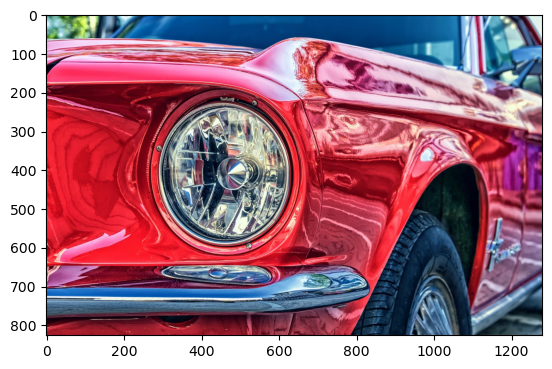

In [86]:
#C:\workspace\python\WASSUP\data\car.jpg

pmt1 = input(prompt1)
img = cv2.imread(pmt1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pmt2 = input(prompt2)
if(pmt2 == "1"):
    image = rotateImg(img)
elif(pmt2 == "2"):
    image = cropImg(img)
elif(pmt2 == "3"):
    image = flipImg(img)
elif(pmt2 == "4"):
    image = moveImg(img)
elif(pmt2 == "5"):
    image = blurImg(img)
elif(pmt2 == "6"):
    image = resizeImg(img)

result = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite(pmt1.split("\\")[-1].split(".")[0]+"_new.jpg", result)
plt.imshow(image)
    
print('이미지 변환 및 저장 완료')